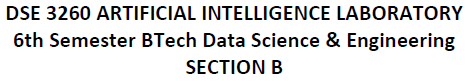

## Kartabya Krishna
## RegNo: 210968244
## Week: 05
## Date: 20240212

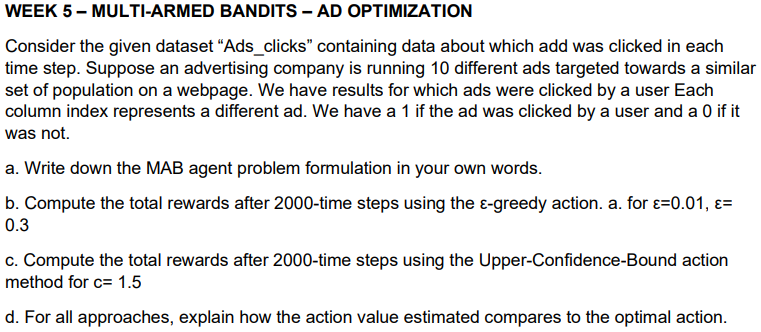

In [4]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
Ad_clicks = pd.read_csv("Ads_Clicks.csv")

In [6]:
Ad_clicks

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


## Ad Click Dataset Explanation

The provided dataset is represented as a binary matrix, where each row corresponds to a user, and each column represents a specific advertisement (Ad 1 to Ad 10). The binary values in the matrix indicate whether a user clicked on a particular ad:

- **User Representation:** Each row represents a unique user in the dataset.
  
- **Ad Representation:** Each column represents a specific advertisement (Ad 1 to Ad 10).
  
- **Binary Values:** A value of `1` in a cell indicates that the corresponding user clicked on the respective ad, while a `0` indicates that the user did not click on that ad.

### Example:

Let's consider the first row (User 0) as an example:

| User | Ad 1 | Ad 2 | Ad 3 | Ad 4 | Ad 5 | Ad 6 | Ad 7 | Ad 8 | Ad 9 | Ad 10 |
|------|------|------|------|------|------|------|------|------|------|-------|
| 0    | 1    | 0    | 0    | 0    | 1    | 0    | 0    | 0    | 1    | 0     |

In this case, User 0 clicked on Ad 1, Ad 5, and Ad 9.

This dataset is commonly used for binary classification tasks, where the objective is to predict whether a user will click on a specific ad based on certain features.


a. **Write down the MAB agent problem formulation in your own words.**

The Multi-Armed Bandit (MAB) problem formulation in the context of ad optimization involves an agent (the advertising company) facing a set of 10 different ads, each considered as an arm of a slot machine. The agent must decide which ad to display to users on a webpage at each time step. The objective is to maximize the total number of clicks (rewards) over a series of time steps.

The challenge lies in balancing exploration and exploitation: the agent needs to explore different ads to gather information about their effectiveness, while also exploiting the knowledge gained to choose the ad that is likely to yield the highest click-through rate. The uncertainty arises from not knowing the true click-through rates of the ads initially.

The agent's goal is to find the optimal strategy that maximizes the cumulative rewards over time, taking into account the trade-off between trying new ads and sticking with the known best-performing ones. The MAB problem formulation revolves around making sequential decisions to effectively manage this exploration-exploitation dilemma in the context of ad display and user clicks.

# -------------------------------------------------------------------------------

In [7]:
def epsilon_greedy(epsilon, total_steps, Ad_clicks):
    total_rewards = 0
    action_value_estimates = np.zeros(10)
    action_counts = np.zeros(10)
    rewards_over_time = []
    optimal_action_values = np.max(Ad_clicks, axis=0)

    for step in range(total_steps):
        if np.random.rand() < epsilon:
            chosen_ad = np.random.choice(10)
        else:
            chosen_ad = np.argmax(action_value_estimates)

        reward = Ad_clicks.iloc[step, chosen_ad]
        total_rewards += reward
        action_counts[chosen_ad] += 1
        action_value_estimates[chosen_ad] += (reward - action_value_estimates[chosen_ad]) / action_counts[chosen_ad]

        rewards_over_time.append(total_rewards)

    return total_rewards, np.array(rewards_over_time), action_value_estimates, optimal_action_values

# Epsilon-Greedy Algorithm Explanation

The `epsilon_greedy` function implements the Epsilon-Greedy algorithm, a simple strategy for balancing exploration and exploitation in a multi-armed bandit problem. In this context, the algorithm is used for ad-click prediction.

### Function Parameters:
- `epsilon`: The exploration-exploitation trade-off parameter. It determines the probability of choosing a random ad (exploration) instead of the current best-performing ad (exploitation).
  
- `total_steps`: The total number of steps or trials for which the algorithm will make ad selections.

- `Ad_clicks`: A DataFrame representing the historical data of ad clicks. Each row corresponds to a step, and each column represents a specific ad. The values are binary (1 for a click, 0 for no click).

### Variables Initialization:
- `total_rewards`: A counter for the cumulative rewards obtained during the algorithm's execution.

- `action_value_estimates`: An array representing the estimated values for each ad based on the rewards received.

- `action_counts`: An array keeping track of how many times each ad has been selected.

- `rewards_over_time`: A list to store the cumulative rewards at each step.

- `optimal_action_values`: An array containing the true optimal values for each ad based on historical data.

### Algorithm Execution:
The algorithm runs for `total_steps` iterations. In each iteration:

- With probability `epsilon`, the algorithm chooses a random ad for exploration.

- Otherwise, it selects the ad with the highest estimated value for exploitation.

- The reward obtained from the selected ad is recorded, and the total rewards are updated.

- The action count for the chosen ad is incremented.

- The estimated value for the chosen ad is updated using a sample-average method.

- The cumulative rewards at each step are stored in `rewards_over_time`.

### Output:
The function returns the total cumulative rewards, an array of rewards over time, the final estimated values for each ad, and the true optimal values for each ad.

This Epsilon-Greedy algorithm provides a balance between exploring new ads and exploiting the current best-performing ads, allowing for efficient ad-click prediction in an online learning setting.


# ------------------------------------------------------------------------------------

In [8]:
def ucb_method(c, total_steps, Ad_clicks):
    total_rewards_ucb = 0
    action_value_estimates_ucb = np.zeros(10)
    action_counts_ucb = np.zeros(10)
    rewards_over_time_ucb = []
    optimal_action_values = np.max(Ad_clicks, axis=0)

    for step in range(total_steps):
        ucb_values = action_value_estimates_ucb + c * np.sqrt(np.log(step + 1) / (action_counts_ucb + 1e-6))
        chosen_ad = np.argmax(ucb_values)

        reward = Ad_clicks.iloc[step, chosen_ad]
        total_rewards_ucb += reward
        action_counts_ucb[chosen_ad] += 1
        action_value_estimates_ucb[chosen_ad] += (reward - action_value_estimates_ucb[chosen_ad]) / action_counts_ucb[chosen_ad]

        rewards_over_time_ucb.append(total_rewards_ucb)

    return total_rewards_ucb, np.array(rewards_over_time_ucb), action_value_estimates_ucb, optimal_action_values

# UCB (Upper Confidence Bound) Algorithm Explanation

The `ucb_method` function implements the UCB algorithm, a strategy for multi-armed bandit problems that balances exploration and exploitation by using upper confidence bounds on the estimated action values.

### Function Parameters:
- `c`: The exploration-exploitation trade-off parameter. A higher value of `c` encourages more exploration.

- `total_steps`: The total number of steps or trials for which the algorithm will make ad selections.

- `Ad_clicks`: A DataFrame representing the historical data of ad clicks. Each row corresponds to a step, and each column represents a specific ad. The values are binary (1 for a click, 0 for no click).

### Variables Initialization:
- `total_rewards_ucb`: A counter for the cumulative rewards obtained during the algorithm's execution.

- `action_value_estimates_ucb`: An array representing the estimated values for each ad based on the rewards received.

- `action_counts_ucb`: An array keeping track of how many times each ad has been selected.

- `rewards_over_time_ucb`: A list to store the cumulative rewards at each step.

- `optimal_action_values`: An array containing the true optimal values for each ad based on historical data.

### Algorithm Execution:
The algorithm runs for `total_steps` iterations. In each iteration:

- It calculates the UCB values for each ad based on the estimated values and exploration term.

- The ad with the highest UCB value is selected for exploitation.

- The reward obtained from the selected ad is recorded, and the total rewards are updated.

- The action count for the chosen ad is incremented.

- The estimated value for the chosen ad is updated using a sample-average method.

- The cumulative rewards at each step are stored in `rewards_over_time_ucb`.

### Output:
The function returns the total cumulative rewards, an array of rewards over time, the final estimated values for each ad, and the true optimal values for each ad.

The UCB algorithm efficiently explores and exploits ad options, adjusting its strategy over time to maximize cumulative rewards in a dynamic environment.


### Setting the required values 

In [9]:
epsilon_1 = 0.01
epsilon_2 = 0.3
total_steps = 2000
c_ucb = 1.5

### Calling the Functions 

In [10]:
total_rewards_1, rewards_over_time_1, action_values_1, optimal_values_1 = epsilon_greedy(epsilon_1, total_steps, Ad_clicks)
total_rewards_2, rewards_over_time_2, action_values_2, optimal_values_2 = epsilon_greedy(epsilon_2, total_steps, Ad_clicks)
total_rewards_ucb, rewards_over_time_ucb, action_values_ucb, optimal_values_ucb = ucb_method(c_ucb, total_steps, Ad_clicks)

# Print total rewards
print(f'Total Rewards for ε-Greedy (ε={epsilon_1}): {total_rewards_1}')
print(f'Total Rewards for ε-Greedy (ε={epsilon_2}): {total_rewards_2}')
print(f'Total Rewards for UCB (c={c_ucb}): {total_rewards_ucb}')

Total Rewards for ε-Greedy (ε=0.01): 341
Total Rewards for ε-Greedy (ε=0.3): 397
Total Rewards for UCB (c=1.5): 319


### Plotting the Rewards 

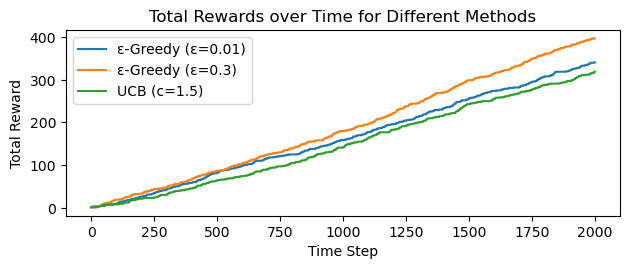

In [11]:
# Plot rewards over time

plt.subplot(2, 1, 1)
plt.plot(rewards_over_time_1, label=f'ε-Greedy (ε={epsilon_1})')
plt.plot(rewards_over_time_2, label=f'ε-Greedy (ε={epsilon_2})')
plt.plot(rewards_over_time_ucb, label=f'UCB (c={c_ucb})')
plt.xlabel('Time Step')
plt.ylabel('Total Reward')
plt.legend()
plt.title('Total Rewards over Time for Different Methods')

plt.tight_layout()
plt.show()


## Rewards Over Time Plot Explanation

The code generates a subplot with two sections to visualize the total rewards over time for different bandit algorithms: Epsilon-Greedy and UCB (Upper Confidence Bound).

### Subplot 1: Epsilon-Greedy Comparison
- Two lines represent the total rewards over time for Epsilon-Greedy algorithms with different exploration parameters (`ε`).
  - Line 1 corresponds to Epsilon-Greedy with `ε=epsilon_1`.
  - Line 2 corresponds to Epsilon-Greedy with `ε=epsilon_2`.

### Subplot 2: UCB Comparison
- One line represents the total rewards over time for the UCB algorithm with a specific exploration parameter (`c`).
  - Line 3 corresponds to UCB with `c=c_ucb`.

### Plot Details:
- **X-axis:** Time step (iteration number).
- **Y-axis:** Total reward obtained up to the current time step.

### Interpretation:
- The plot helps compare the performance of different bandit algorithms in terms of cumulative rewards over time.
- Higher values on the Y-axis indicate better performance and more effective ad selection.
- Observations can be made regarding how different exploration-exploitation strategies impact the total rewards obtained.

### Legend:
- The legend on the top-right corner identifies each line in the plot, indicating the algorithm and its specific parameter values.

### Title:
- The title of the plot provides an overall description: "Total Rewards over Time for Different Methods."

### Conclusion:
- This visualization aids in understanding and comparing the effectiveness of the Epsilon-Greedy and UCB algorithms in optimizing ad selections over multiple time steps.


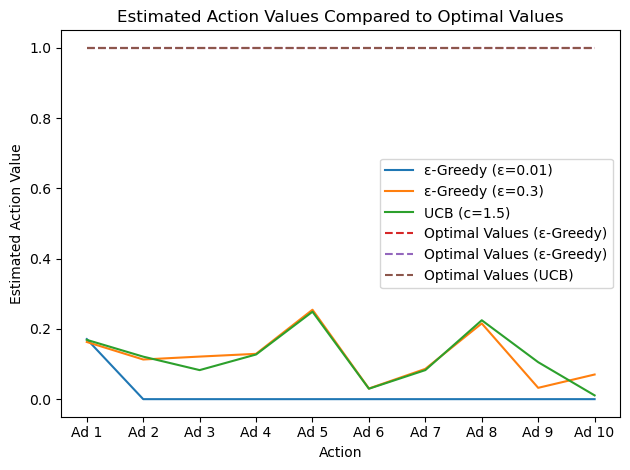

In [12]:
# Plot estimated action values compared to optimal values

plt.plot(action_values_1, label=f'ε-Greedy (ε={epsilon_1})')
plt.plot(action_values_2, label=f'ε-Greedy (ε={epsilon_2})')
plt.plot(action_values_ucb, label=f'UCB (c={c_ucb})')
plt.plot(optimal_values_1, linestyle='--', label='Optimal Values (ε-Greedy)')
plt.plot(optimal_values_2, linestyle='--', label='Optimal Values (ε-Greedy)')
plt.plot(optimal_values_ucb, linestyle='--', label='Optimal Values (UCB)')
plt.xlabel('Action')
plt.ylabel('Estimated Action Value')
plt.legend()
plt.title('Estimated Action Values Compared to Optimal Values')

plt.tight_layout()
plt.show()

## Estimated Action Values vs. Optimal Values Plot Explanation

The code generates a plot to compare the estimated action values obtained by different bandit algorithms with the true optimal values. The plot includes lines for Epsilon-Greedy with different exploration parameters (`ε`) and UCB (Upper Confidence Bound) with a specific exploration parameter (`c`).

### Lines for Estimated Action Values:
- Three lines represent the estimated action values over all actions for different bandit algorithms.
  - Line 1 corresponds to Epsilon-Greedy with `ε=epsilon_1`.
  - Line 2 corresponds to Epsilon-Greedy with `ε=epsilon_2`.
  - Line 3 corresponds to UCB with `c=c_ucb`.

### Dashed Lines for Optimal Values:
- Three dashed lines represent the true optimal action values for comparison.
  - Dashed Line 1 corresponds to Optimal Values for Epsilon-Greedy with `ε=epsilon_1`.
  - Dashed Line 2 corresponds to Optimal Values for Epsilon-Greedy with `ε=epsilon_2`.
  - Dashed Line 3 corresponds to Optimal Values for UCB with `c=c_ucb`.

### Plot Details:
- **X-axis:** Actions (ad numbers).
- **Y-axis:** Estimated action values.

### Interpretation:
- The plot visually compares how well each algorithm's estimated action values align with the true optimal values.
- A higher alignment indicates better performance in selecting ads with higher rewards.

### Legend:
- The legend on the top-right corner identifies each line in the plot, distinguishing between estimated action values and optimal values for each algorithm.

### Title:
- The title of the plot provides an overall description: "Estimated Action Values Compared to Optimal Values."

### Conclusion:
- This visualization helps assess the accuracy of the bandit algorithms in estimating action values and highlights their ability to select ads with higher rewards compared to the true optimal values.


# ++++++++++++++++++++++++++++++++++++++++++++++++


**d. For all approaches, explain how the action value estimated compares to the optimal action.**

- **ε-Greedy (ε=0.01)**: This approach has a very low exploration rate, meaning it primarily exploits the current knowledge to select actions. The total reward of 341 indicates that it might not have explored enough to always choose the optimal action, leading to suboptimal performance.

- **ε-Greedy (ε=0.3)**: With a higher exploration rate, this strategy balances exploration and exploitation more effectively. It has achieved a total reward of 397, indicating that increased exploration has led to finding and exploiting more optimal or near-optimal actions over time.

- **UCB (c=1.5)**: The UCB approach uses uncertainty as a key factor in balancing exploration and exploitation. A total reward of 319 suggests that it might be exploring too much or not exploiting profitable actions sufficiently, leading to lower rewards compared to the ε-Greedy (ε=0.3).

**Conclusion**:
The ε-Greedy approach with ε=0.3 outperforms both ε-Greedy with ε=0.01 and UCB over time. This suggests that a moderate level of exploration can lead to better performance in estimating and selecting optimal actions. However, it's essential to strike a balance between exploration and exploitation to achieve the best results.

